In [1]:
!pip install pandas matplotlib

  Using cached pandas-2.0.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 10.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 9.7 MB/s eta 0:00:00:00:0100:01
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 10.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.7/300.7 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.8 MB/s eta 0:00:00:00:0100:01


In [3]:
import pandas as pd 

In [4]:
df = pd.read_json("/home/lucas/Área de Trabalho/Alura/EngenhariaDados/FormacaoAirflow/Datalake/Gold/twitter_datascience/process_date=2023-07-14/part-00000-83c67084-f2f7-432d-814c-b19260bfb0e7-c000.json",
                  lines=True)

In [5]:
df.head()

,created_date,n_tweets,n_like,n_quote,n_reply,n_retweet,weekday
0,2023-07-12,18,999,846,1134,1074,Wed
1,2023-07-10,20,843,1015,1190,1120,Mon
2,2023-07-13,9,558,458,436,555,Thu
3,2023-07-09,9,425,565,409,390,Sun
4,2023-07-11,38,2569,2279,2416,2514,Tue


In [13]:
df.created_date = pd.to_datetime(df.created_date)

In [16]:
#df.groupby("weekday").sum().loc[:].reset_index().plot(kind="bar", x="weekday", y=["n_tweets", "n_like", "n_quote", "n_reply"])


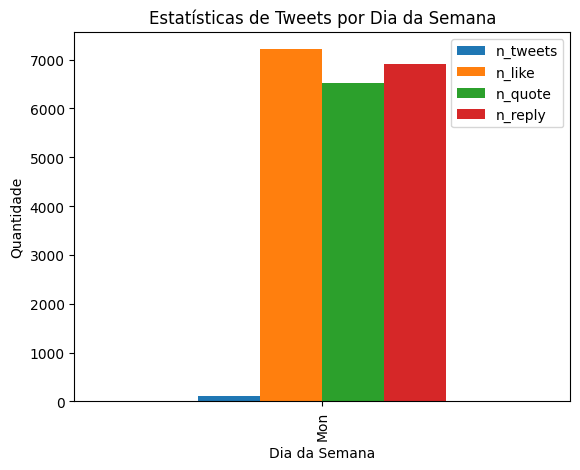

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter a coluna "weekday" para o tipo de dados datetime
df['weekday'] = pd.to_datetime(df['weekday'], format='%a')

# Converter a coluna "weekday" para string formatada
df['weekday'] = df['weekday'].dt.strftime('%a')

# Realizar o agrupamento e selecionar apenas as colunas numéricas
df_grouped = df.groupby("weekday")[["n_tweets", "n_like", "n_quote", "n_reply"]].sum()

# Plotar o gráfico de barras
df_grouped.plot(kind="bar")
plt.xlabel("Dia da Semana")
plt.ylabel("Quantidade")
plt.title("Estatísticas de Tweets por Dia da Semana")
plt.show()
